In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


CPU times: user 1.71 s, sys: 130 ms, total: 1.84 s
Wall time: 1.53 s


In [3]:
df = pd.read_csv('/mnt/c/Users/xtanv/Study Mart/Dataset/NASDAQ_100_Data_From_2010.csv',sep='\t')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64

In [6]:
df = df.drop(columns=['Date','High','Low','Adj Close','Volume','Name'])

In [7]:
df.head()

,Open,Close
0,7.622500,7.643214
1,7.664286,7.656429
2,7.656429,7.534643
3,7.562500,7.520714
4,7.510714,7.570714


Text(0.5, 1.0, 'NASDAQ 100 Open vs Close')

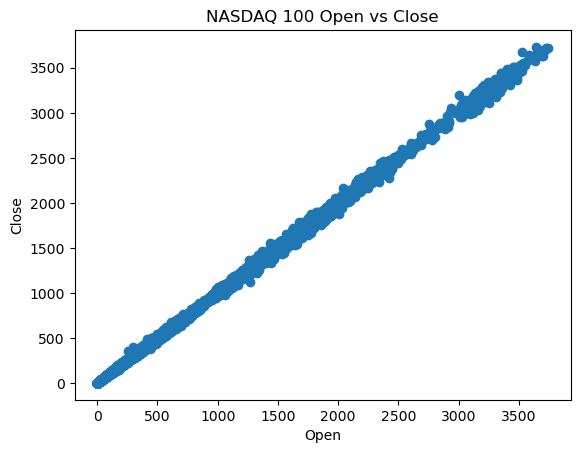

In [8]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('NASDAQ 100 Open vs Close')

In [9]:
x = df.drop(columns=['Close'])

In [10]:
x.head()

,Open
0,7.622500
1,7.664286
2,7.656429
3,7.562500
4,7.510714


In [11]:
y= df[['Close']]
y.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [12]:
#linear regression
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
x.mean()

Open    130.14706
dtype: float64

In [15]:
y.mean()

Close    130.17396
dtype: float64

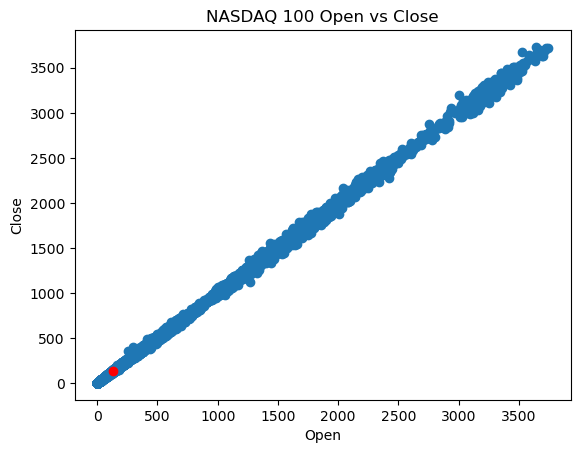

In [16]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('NASDAQ 100 Open vs Close')
plt.scatter(x.mean(),y.mean(),color='red')

In [17]:
reg.fit(x,y)

LinearRegression()

In [18]:
m = reg.coef_
m

array([[0.99981887]])

In [19]:
c= reg.intercept_
c

array([0.05047316])

In [20]:
m*39.529998779296875 + c

array([[39.57331201]])

In [21]:
reg.predict([[39.529998779296875]])

/home/tan/miniforge3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[39.57331201]])

In [22]:
df['Predicted Close'] = reg.predict(x)
df.head()

,Open,Close,Predicted Close
0,7.622500,7.643214,7.671592
1,7.664286,7.656429,7.713371
2,7.656429,7.534643,7.705515
3,7.562500,7.520714,7.611603
4,7.510714,7.570714,7.559827


Text(0.5, 1.0, 'NASDAQ 100 Open vs Close')

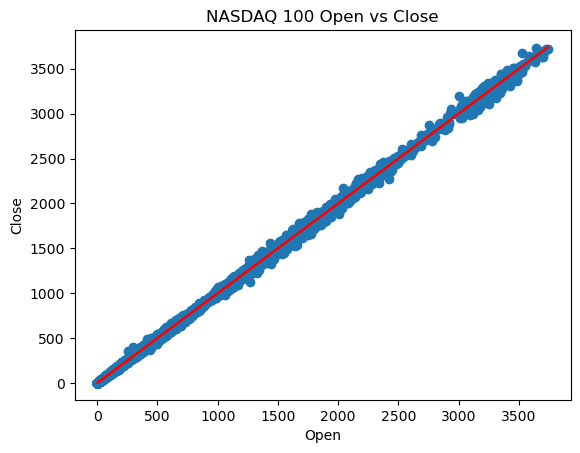

In [23]:
plt.plot(x,reg.predict(x),color='red')
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('NASDAQ 100 Open vs Close')

In [24]:
#Loss and Cost Function
#loss is specific to the model
#cost is specific to the dataset
#loss is the difference between the predicted value and the actual value
#cost is the sum of all the losses
#cost function is the function that calculates the cost
#cost function is the mean squared error

df['loss'] = df['Close'] - df['Predicted Close']
df.head()

,Open,Close,Predicted Close,loss
0,7.622500,7.643214,7.671592,-0.028378
1,7.664286,7.656429,7.713371,-0.056942
2,7.656429,7.534643,7.705515,-0.170872
3,7.562500,7.520714,7.611603,-0.090890
4,7.510714,7.570714,7.559827,0.010887


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mse = mean_squared_error(df['Close'],df['Predicted Close'])
mae = mean_absolute_error(df['Close'],df['Predicted Close'])

In [29]:
mse,mae

(20.070875514454283, 1.527079548726255)

In [31]:
sum(abs(df['loss']))/len(x)

1.5270795487262743

In [36]:
reg.score(x,y)

0.9997018438357456

In [38]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.9997018438357456